# First ML Algorthm

En este proyecto se abordará la cuestión de identificar a los clientes que tienen mayor posibilidad de realizar un depósito, con el propósito de encaminar esfuerzos dirigidos al marketing que se les hará llegar a estos usuarios.

## Paso 1. Cargar la data

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Antes de comenzar el EDA, se ha dado un primer vistazo y con esto se pueden comenzar a analizar e incluso descartar algunas variables:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Se considera una variable relevante y se observan los valores únicos para considerar agruparlos.
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [7]:
df.drop(['contact', 'month', 'day_of_week', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
 7   duration   41188 non-null  int64 
 8   campaign   41188 non-null  int64 
 9   pdays      41188 non-null  int64 
 10  previous   41188 non-null  int64 
 11  poutcome   41188 non-null  object
 12  y          41188 non-null  object
dtypes: int64(5), object(8)
memory usage: 4.1+ MB


Ahora que se eliminaron las variables con poca relevancia, se convertirá de variables categóricas a variables númericas, las siguientes columnas: job, marital, education, default, housing, loan, poutcome y la variable y:

In [21]:
# Variable categóricas a Variables númericas
# Variable job
df['job'] = df['job'].replace({'housemaid': 1, 'services': 2, 'admin.':3, 'blue-collar':4, 
                               'technician':5, 'retired':6, 'management':7,'unemployed':8,'self-employed':9,
                               'unknown':10, 'entrepreneur':11, 'student':12})

# Variable marital
df['marital'] = df['marital'].replace({'married': 1, 'single': 2, 'divorced':3, 'unknown':4})

# Variable education
df['education'] = df['education'].replace({'basic.4y':1, 'high.school':2, 'basic.6y':3, 'basic.9y':4,
                                           'professional.course':5, 'unknown':6, 'university.degree':7,
                                           'illiterate':8})
# Variable default
df['default'] = df['default'].replace({'no':0, 'yes':1, 'unknown':2})

# Variable housing
df['housing'] = df['housing'].replace({'no':0, 'yes':1, 'unknown':2})

# Variable loan
df['loan'] = df['loan'].replace({'no':0, 'yes':1, 'unknown':2})

# Variable poutcome
df['poutcome'] = df['poutcome'].replace({'failure':0, 'success':1,'nonexistent':2})

# Variable y
df['y'] = df['y'].replace({'no':0, 'yes':1})

In [ ]:
# Se comprueba que ahora todas las variables son númericas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        41188 non-null  int64
 1   job        41188 non-null  int64
 2   marital    41188 non-null  int64
 3   education  41188 non-null  int64
 4   default    41188 non-null  int64
 5   housing    41188 non-null  int64
 6   loan       41188 non-null  int64
 7   duration   41188 non-null  int64
 8   campaign   41188 non-null  int64
 9   pdays      41188 non-null  int64
 10  previous   41188 non-null  int64
 11  poutcome   41188 non-null  int64
 12  y          41188 non-null  int64
dtypes: int64(13)
memory usage: 4.1 MB


## Paso 2. EDA

### Análisis univariable. 

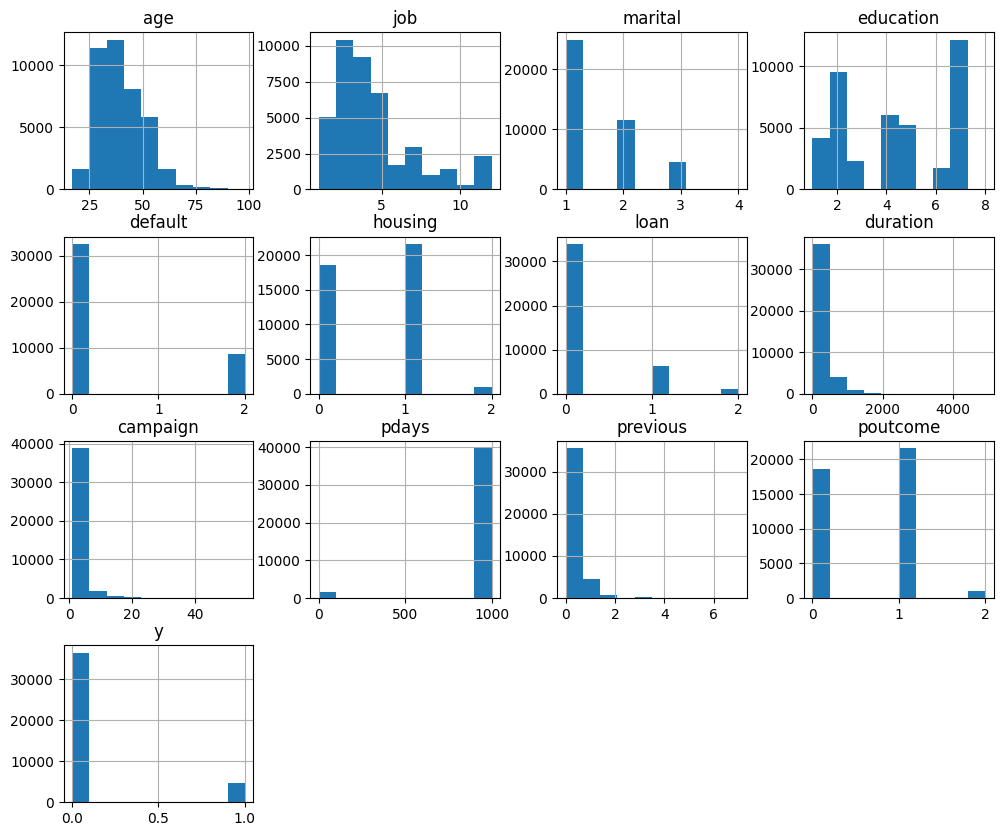

In [23]:
import matplotlib.pyplot as plt


df.hist(figsize=(12,10))
plt.show()

### Análisis de Outliers. 

### Análisis Bivariado. 

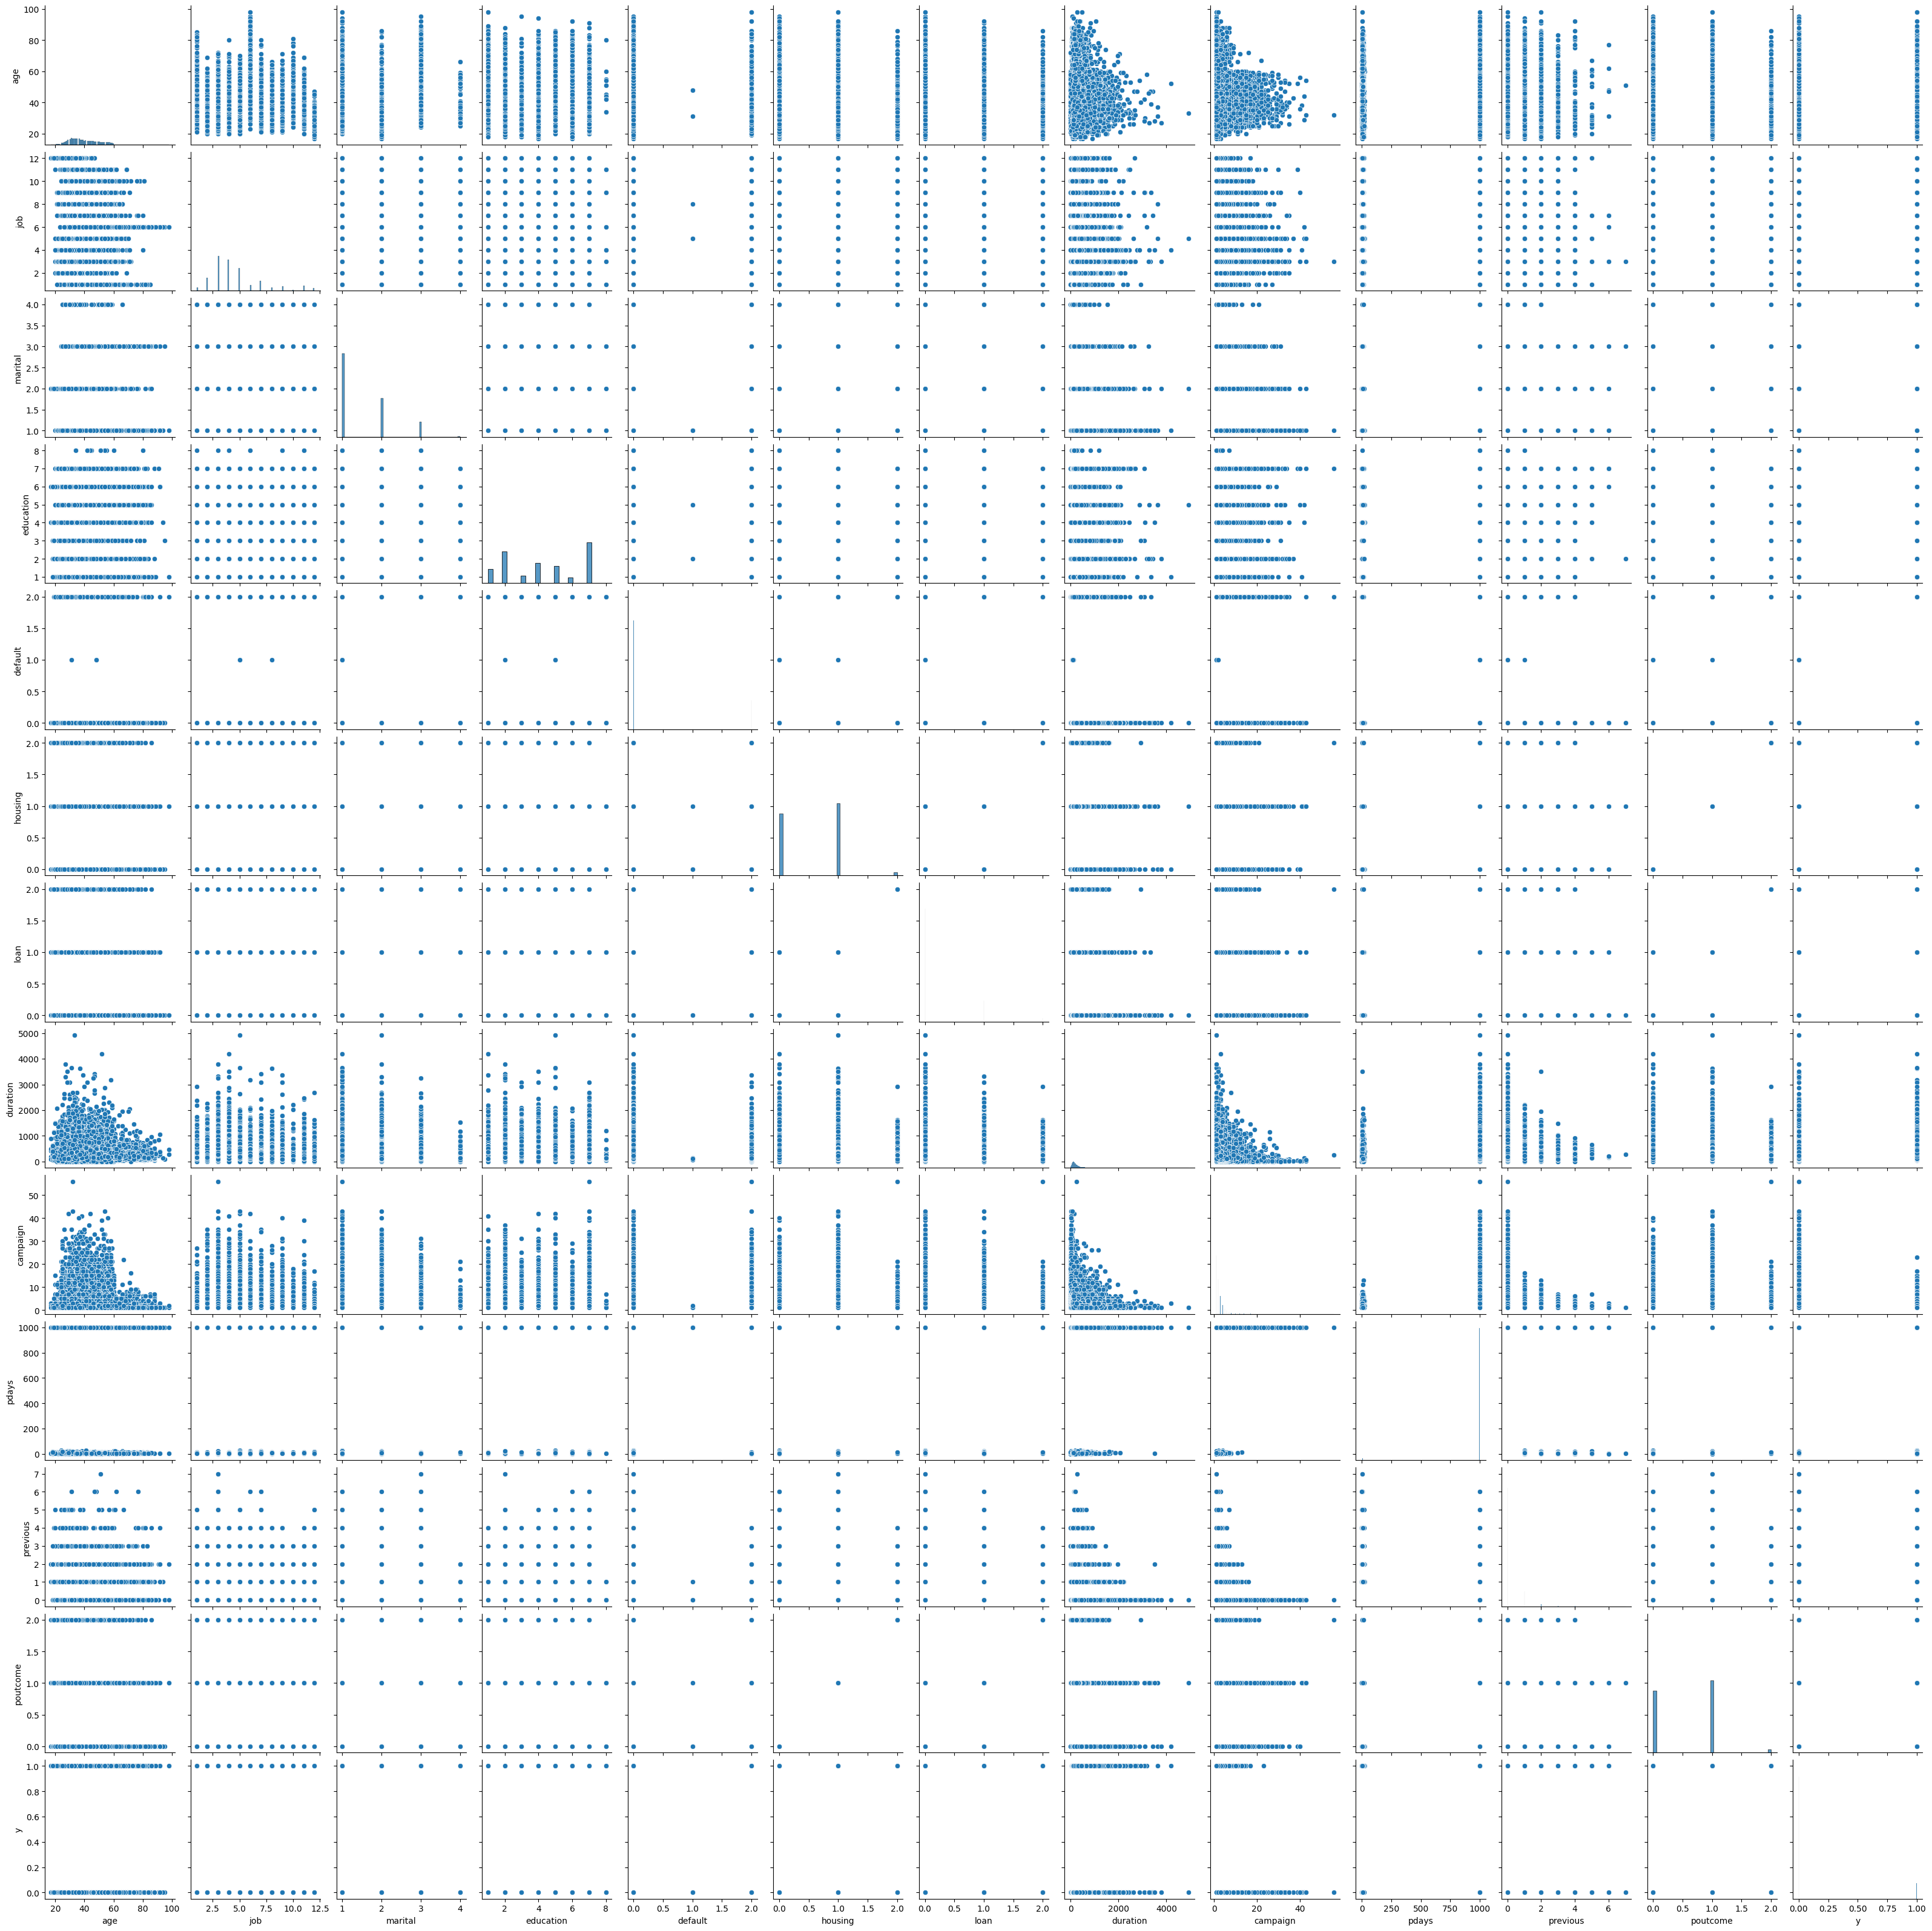

In [24]:
import seaborn as sns

sns.pairplot(df)

Se busca alguna correlación entre las variables.

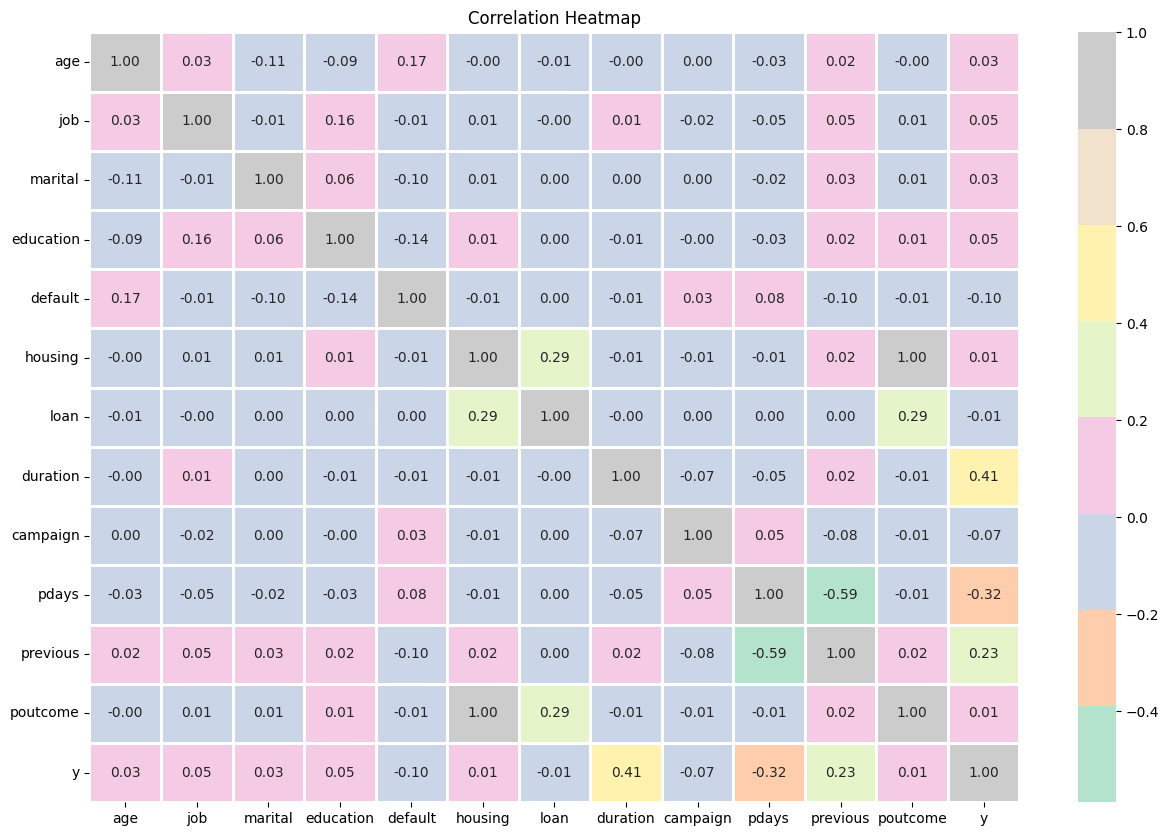

In [27]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

### Conclusión de matriz de correlación:  
Como se observa en la matriz de correlación, en su mayoría las correlaciones que se muestran son débiles, sin embargo, hay algunas correlaciones interesantes, aunque débiles, muestran un interesante relación, entre las más relevante esta la variable objetivo "Y" y la duración de la última llamada realizada con el cliente, otra relación interesante en la que tiene "pdays" y "previous", número de días de la última campaña y la cantidad de contactos con el cliente.